In [1]:
#importing a bunch of library for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# csv_read_self is defined to read the scv files and handle exceptions
def csv_read_self(location):
    try:
        if location[-3:] == 'csv':
            with open(location,'r+',encoding = "utf-8-sig" ) as file:
                in_file = []

                i = file.readlines()

                for i in i:
                    i = i.rstrip('\n') # remove `\n` at the end of line
                    j = i.split(',')
                    in_file.append((j))

                # after for-loop
                return in_file
        else:
            print('Plese give a csv file')
    except OSError:
        print(f'File Not Found at the {location} please check')
#if there is time do the exception handeling for directory missing

In [3]:
#Storing all the locations in a string to pass it in the function
location_b =  "barometer-last-year.csv"
location_i = "indoor-temperature-last-year.csv"
location_o = "outside-temperature-last-year.csv"
location_r = "rainfall-last-year.csv"

In [4]:
#storing the file by reading in the form of a list
barometer = csv_read_self(location_b)
indoor_temp = csv_read_self(location_i)
outdoor_temp = csv_read_self(location_o)
rainfall_last_year = csv_read_self(location_r)

In [5]:
#creating pandas data frame for each of the list to give a structure of table,have also made the 1st column as header
df_baro = pd.DataFrame(data = barometer[1:],columns=['DateTime', 'Baro'])
df_in = pd.DataFrame(data = indoor_temp[1:],columns=['DateTime','Humidity','Temperature','Temperature_range (low)','Temperature_range (high)'])
df_out = pd.DataFrame(data = outdoor_temp[1:],columns=['DateTime','Temperature','Temperature_range (low)','Temperature_range (high)'])
df_rain = pd.DataFrame(data = rainfall_last_year[1:],columns=['DateTime', 'mm'])

In [6]:
#joining/Merging baro and out data frame to one and rain and in to another one
df_baro_out = df_baro.merge(df_out,on = 'DateTime',how = 'left')
df_rain_in = df_in.merge(df_rain,on ='DateTime',how = 'left')

#final merge of all the data frame on DateTime
df_baro_out_in_rain = df_baro_out.merge(df_rain_in,on ='DateTime',how = 'left')

In [7]:
#changing the numerical data types to float
for i in df_baro_out_in_rain:
    if i!='DateTime':
        df_baro_out_in_rain[i]=df_baro_out_in_rain[i].astype(float)

In [8]:
#set the index as date time
#data is with out index as it might be usefull later
data = df_baro_out_in_rain
df_baro_out_in_rain = df_baro_out_in_rain.set_index('DateTime')

In [9]:
#Renaming the columns as with x as ou and y as in it is difficutl to interpreat
data=data.rename(columns={"Temperature_x":"Temperature_out","Temperature_y":"Temperature_in",
                                        "Temperature_range (low)_x":"Temp_range_low_out",
                                        "Temperature_range (low)_y":"Temp_range_low_in",
                                       "Temperature_range (high)_x":"Temp_range_high_out",
                                       "Temperature_range (high)_y":"Temp_range_high_in"})
#Renaming the columns as with x as ou and y as in it is difficutl to interpreat
df_baro_out_in_rain=df_baro_out_in_rain.rename(columns={"Temperature_x":"Temperature_out","Temperature_y":"Temperature_in",
                                        "Temperature_range (low)_x":"Temp_range_low_out",
                                        "Temperature_range (low)_y":"Temp_range_low_in",
                                       "Temperature_range (high)_x":"Temp_range_high_out",
                                       "Temperature_range (high)_y":"Temp_range_high_in"})

In [10]:
#get the statistics of each of the cols with raw data for task-1
df_baro_out_in_rain.describe()

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm
count,355.000000,355.000000,355.000000,355.000000,354.000000,354.000000,354.000000,354.000000,352.000000
mean,1009.998873,11.138877,7.865634,15.524225,48.519774,21.827885,20.555932,23.533616,1.550284
std,9.869662,5.355042,4.878930,7.034445,5.188886,2.058307,2.405125,1.701466,3.329203
min,979.600000,-1.810000,-4.100000,1.500000,37.000000,18.040000,14.900000,19.700000,0.000000
25%,1004.850000,7.390000,4.350000,10.250000,44.000000,20.345000,18.725000,22.500000,0.000000
50%,1010.500000,10.960000,8.000000,15.100000,48.000000,21.710000,20.600000,23.200000,0.000000
75%,1016.050000,15.050000,12.050000,19.850000,52.000000,22.710000,21.900000,24.100000,1.100000
max,1035.600000,26.380000,18.700000,38.500000,59.000000,29.210000,28.200000,31.100000,23.200000


<AxesSubplot:>

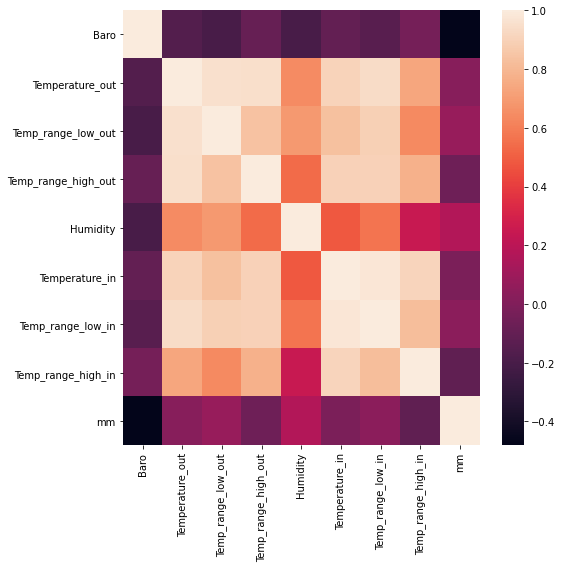

In [11]:
#check the correlation of each columns in a heat map to give visual understanding.
corr = df_baro_out_in_rain.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr)
#plt.savefig('heat map.png', transparent=True,dpi=300, bbox_inches='tight')

In [12]:
#numerical representation of correlation between cols.
corr   #.to_excel('f.xlsx')

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm
Baro,1.000000,-0.157571,-0.199476,-0.087452,-0.200786,-0.101517,-0.144429,-0.036803,-0.480654
Temperature_out,-0.157571,1.000000,0.954362,0.952036,0.644720,0.902442,0.937128,0.734264,0.024470
Temp_range_low_out,-0.199476,0.954362,1.000000,0.839464,0.690491,0.834862,0.894525,0.637049,0.077509
Temp_range_high_out,-0.087452,0.952036,0.839464,1.000000,0.540705,0.897245,0.899350,0.779789,-0.062280
Humidity,-0.200786,0.644720,0.690491,0.540705,1.000000,0.481282,0.570255,0.247138,0.170841
Temperature_in,-0.101517,0.902442,0.834862,0.897245,0.481282,1.000000,0.978688,0.911397,-0.015083
Temp_range_low_in,-0.144429,0.937128,0.894525,0.899350,0.570255,0.978688,1.000000,0.826338,0.037975
Temp_range_high_in,-0.036803,0.734264,0.637049,0.779789,0.247138,0.911397,0.826338,1.000000,-0.110527
mm,-0.480654,0.024470,0.077509,-0.062280,0.170841,-0.015083,0.037975,-0.110527,1.000000


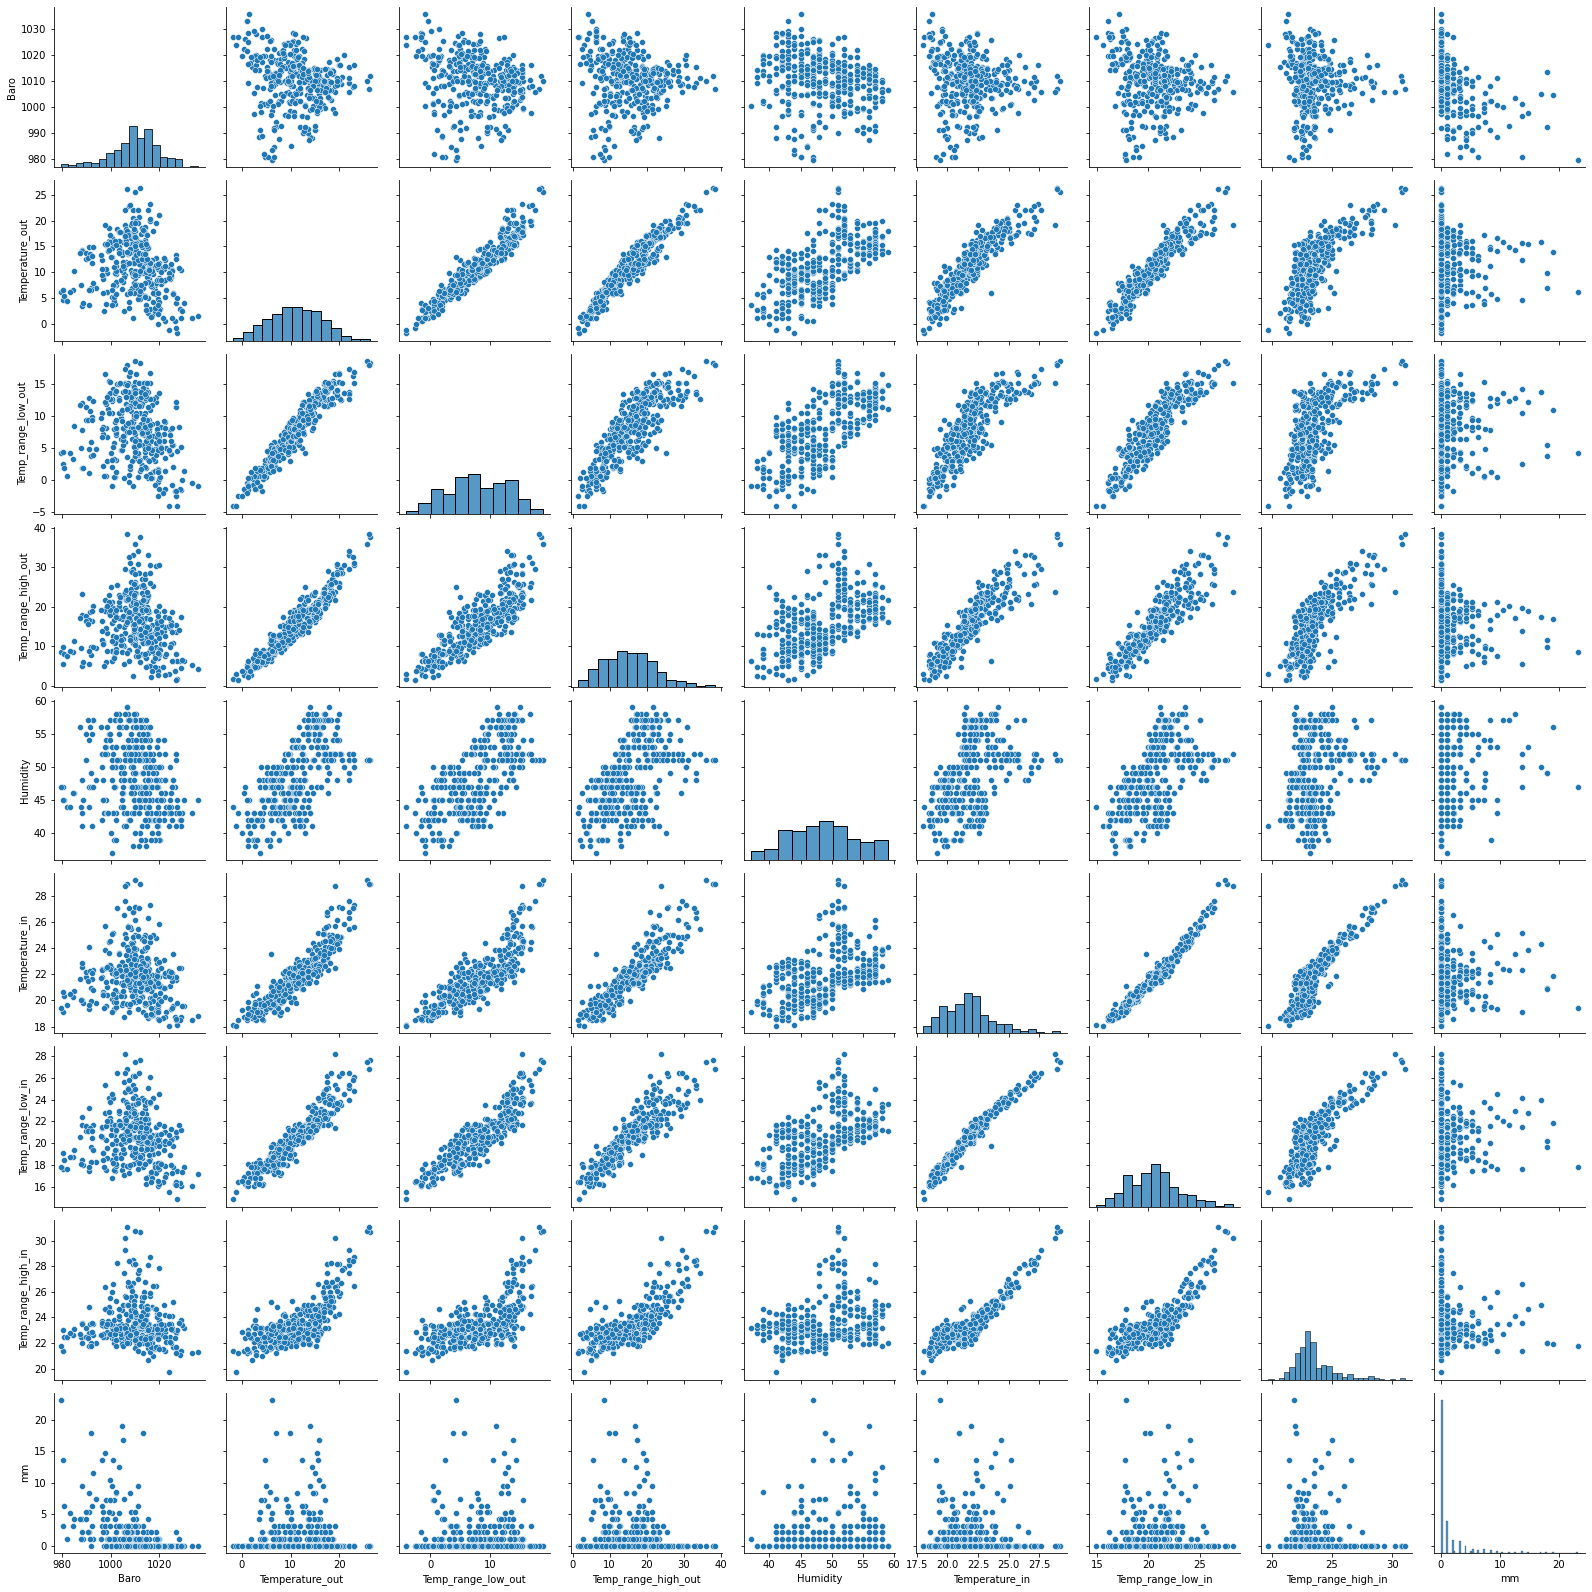

In [13]:
# Further more ghraphical view of the relation ships b/w the cols helps us to understand the relation ship and the spread
sns.pairplot(df_baro_out_in_rain)
#plt.savefig('sns plot.png', transparent=True,dpi=300, bbox_inches='tight')

In [14]:
#preparing the data
lst = data["DateTime"].tolist()
for i in range(len(lst)):
    lst[i] = lst[i][1:11]
data['Formated_date']= lst
#data = data.set_index("Formated_date")   check and remove the line before submission Sourav

In [15]:
#Adding month col to data
month = []

for i in data['Formated_date']:
    a=i
    datee = (datetime.datetime.strptime(a, "%Y-%m-%d"))
    month.append(datee.month)
    
data['Month'] = month 

In [16]:
#as I can see there is only one humidity value Nan and easy to fill I am filling it with the mean 
#of that month humidity as it is not much corealtes with any other feature
data['Humidity'].fillna(data[data['Month'] == 7]['Humidity'].mean(), inplace=True)

In [17]:
# points to fill tempy,_low,y_high
#use the cor-relation with temp_x and find the temp_y
#for mm take the avarage of one day before and after

<AxesSubplot:xlabel='Temperature_out'>

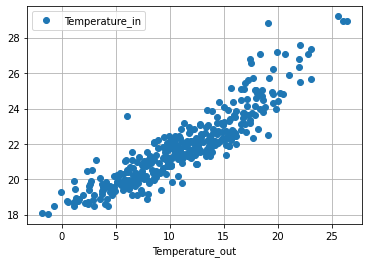

In [18]:
#Visulisation of relationship between temp_out and temp_in
data.plot(x='Temperature_out', y='Temperature_in',style='o',grid = True)

In [19]:
#clearly we can see the ther are roughly 2 points 1,19)   (21,26)
#if we plot a line across those it results to y=0.35x+18.65 manully done

In [20]:
#to find y/temp_in we substitue the coresponding x value which is 14.36
y=(0.35*(14.36))+18.65
data['Temperature_in'].fillna(y, inplace=True)

In [21]:
from sklearn import linear_model
data_train = data.copy() 
data_train = data_train.dropna()
reg = linear_model.LinearRegression()
reg.fit(data_train[['Temperature_in']],data_train.Temp_range_low_in)
m = reg.coef_
c = reg.intercept_
t = m*23.676+c
data['Temp_range_low_in'].fillna(t[0], inplace=True)

In [22]:
reg1 = linear_model.LinearRegression()
reg1.fit(data_train[['Temperature_in']],data_train.Temp_range_high_in)
m1 = reg.coef_
c1 = reg.intercept_
t1 = m1*23.676+c1
data['Temp_range_high_in'].fillna(t[0], inplace=True)

In [23]:
#to check the remaining na values
is_na_1 = data.isnull()
na_row_1 = is_na_1.any(axis=1)
na_set_1 = data[na_row_1]
na_set_1

,DateTime,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Formated_date,Month
73,"""2016-12-22 00:00:00""",1019.6,4.84,1.7,7.9,47.000000,19.560,17.600000,21.700000,NaN,2016-12-22,12
218,"""2017-05-17 00:00:00""",1009.5,12.67,9.7,14.5,48.000000,22.200,21.600000,23.000000,NaN,2017-05-17,5
284,"""2017-07-22 00:00:00""",999.4,14.36,10.6,18.5,53.033333,23.676,22.667397,22.667397,NaN,2017-07-22,7


In [24]:
A = [73, 218, 284]#na values replaced for na_set_1['mm'].index
a = []
for i in na_set_1['mm'].index:
    a.append((float(data.loc[[i+1]]['mm'])+float(data.loc[[i-1]]['mm']))/2)
    
for i in a:
    for j in A:
        data['mm'].loc[A]=a

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
#Just to get an idea of the effect of na filling on correlation
corr_1 = data.corr()
corr_1

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Month
Baro,1.000000,-0.157571,-0.199476,-0.087452,-0.202883,-0.103961,-0.146700,-0.035183,-0.479550,0.062832
Temperature_out,-0.157571,1.000000,0.954362,0.952036,0.645180,0.902480,0.937121,0.732754,0.031935,0.125523
Temp_range_low_out,-0.199476,0.954362,1.000000,0.839464,0.690825,0.834964,0.894545,0.635726,0.082698,0.161324
Temp_range_high_out,-0.087452,0.952036,0.839464,1.000000,0.541031,0.897071,0.899195,0.778697,-0.053882,0.066185
Humidity,-0.202883,0.645180,0.690825,0.541031,1.000000,0.482423,0.571180,0.245535,0.177026,0.507384
Temperature_in,-0.103961,0.902480,0.834964,0.897071,0.482423,1.000000,0.978735,0.908738,-0.002542,0.006981
Temp_range_low_in,-0.146700,0.937121,0.894545,0.899195,0.571180,0.978735,1.000000,0.823877,0.048317,0.063877
Temp_range_high_in,-0.035183,0.732754,0.635726,0.778697,0.245535,0.908738,0.823877,1.000000,-0.112215,-0.173802
mm,-0.479550,0.031935,0.082698,-0.053882,0.177026,-0.002542,0.048317,-0.112215,1.000000,0.096194
Month,0.062832,0.125523,0.161324,0.066185,0.507384,0.006981,0.063877,-0.173802,0.096194,1.000000


In [26]:
#Adding season column to data
season = []
for i in range(len(data)):
    if data['Month'][i] >=3 and data['Month'][i]<=5:
        season.append('spring')
    elif data['Month'][i] >=6 and data['Month'][i]<=8:
        season.append('summer')
    elif data['Month'][i] >=9 and data['Month'][i]<=11:
        season.append('autum')
    elif data['Month'][i] ==12 or data['Month'][i]<=2:
        season.append('winter')

data['season']=season   

In [27]:
# Creating data_month and data_season data frames to do analysis based on months and season
s=['Baro', 'Temperature_out', 'Temp_range_low_out','Temp_range_high_out', 'Humidity', 'Temperature_in','Temp_range_low_in', 'Temp_range_high_in', 'mm']
data_month = data.groupby(['Month'])[s].mean()
data_season = data.groupby(['season'])[s].mean()

In [28]:
#Month Stats
data_month.describe()

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1009.934264,11.224310,7.951709,15.629586,48.681497,21.858570,20.595256,23.549776,1.586902
std,4.559433,4.897745,4.268367,6.364547,5.000357,1.814373,2.200940,1.272614,0.963358
min,1005.757143,4.424839,1.780645,7.090323,42.483871,19.563226,17.532258,21.863333,0.243333
25%,1006.398333,6.290208,4.199643,8.899048,44.747581,20.219976,18.561905,22.693977,0.997083
50%,1008.128925,10.730197,7.262083,15.270000,47.200000,21.714749,20.526042,23.135000,1.262788
75%,1013.839427,15.062687,11.385227,21.457148,52.797396,23.274095,22.319721,24.468658,1.888712
max,1018.780000,18.156129,14.200000,24.209677,57.000000,24.697333,23.796667,25.800000,3.606452


In [29]:
#Season stats
data_season.describe()

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1009.958087,11.251361,7.965548,15.662818,48.607246,21.878883,20.614107,23.568536,1.598945
std,2.689637,4.898675,4.231491,6.361999,4.884372,1.893384,2.267237,1.342501,0.725857
min,1007.133735,5.623371,3.257303,8.151685,43.842697,19.837303,18.030337,22.483146,0.880220
25%,1008.498379,9.292266,6.333831,12.677324,44.727158,20.849961,19.550791,22.585460,1.031993
50%,1009.592565,10.912121,7.530757,15.496781,48.521859,21.671669,20.459024,23.205936,1.583683
75%,1011.052272,12.871216,9.162474,18.482275,52.401947,22.700591,21.522340,24.189012,2.150635
max,1013.513483,17.557831,13.543373,23.506024,53.542570,24.334892,23.508041,25.379125,2.348193


In [30]:
#Adding name of month to use it graph axis
data_month["name"] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

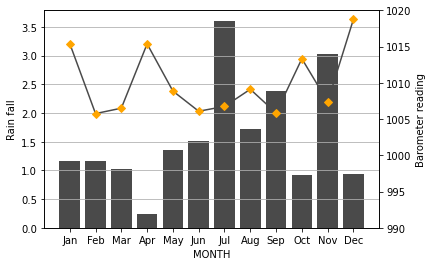

In [31]:
#Monthly graph for baro and rain fall
fig,ax = plt.subplots()

plt2 = ax.bar(data_month['name'],data_month['mm'],color = '#4a4a4a')

ax_b=ax.twinx()

plt1 = ax_b.plot(data_month['name'],data_month['Baro'],marker='D',mec = 'orange',mfc = 'orange',color = '#4a4a4a')
ax_b.set_ylim(990,1020)
ax.set_xlabel('MONTH')
ax_b.set_ylabel('Barometer reading')
ax.set_ylabel('Rain fall')

ax.grid(axis='y')
plt.show()
#fig.savefig('baro_rain.png', transparent=True,dpi=300, bbox_inches='tight')

In [32]:
df = data.groupby(data['Month'])

In [33]:
#Better understaing of the spread among the months
df.describe()

Baro                                                               \
      count         mean        std     min       25%      50%       75%   
Month                                                                      
1      31.0  1015.422581   9.825942   998.1  1005.350  1018.30  1023.200   
2      28.0  1005.757143  12.848618   980.9   996.875  1009.25  1016.525   
3      30.0  1006.503333  11.363356   980.8  1000.650  1008.75  1014.050   
4      30.0  1015.373333   7.881665   992.4  1011.700  1015.35  1020.275   
5      31.0  1008.864516   7.792113   988.2  1005.400  1010.10  1014.450   
6      30.0  1006.083333   7.415179   989.9  1003.675  1007.00  1009.925   
7      31.0  1006.745161   6.168784   997.7  1000.350  1008.00  1012.300   
8      22.0  1009.113636   3.384741  1001.9  1007.050  1009.75  1010.525   
9      30.0  1005.846667   7.962400   987.4  1003.425  1007.45  1011.925   
10     32.0  1013.328125   7.649846   998.0  1009.000  1013.95  1019.125   
11     30.0  1007.393333  13.117872   979.6  1000.925  1009.25  1017.850   
12     30.0  1018.780000   6.589145  1009.2  1015.450  1017.05  1021.775   

              Temperature_out             ... Temp_range_high_in          mm  \
          max           count       mean  ...                75%   max count   
Month                                     ...                                  
1      1030.2            31.0   4.424839  ...             23.200  24.7  31.0   
2      1021.7            28.0   6.312500  ...             23.225  24.3  28.0   
3      1025.3            30.0   8.982333  ...             23.500  25.3  30.0   
4      1028.6            30.0  10.305667  ...             23.800  25.0  30.0   
5      1019.7            31.0  14.531613  ...             24.700  28.5  31.0   
6      1019.9            30.0  17.601000  ...             26.650  31.1  30.0   
7      1016.2            31.0  18.156129  ...             26.550  29.3  31.0   
8      1015.2            22.0  16.655909  ...             25.000  28.2  22.0   
9      1015.2            30.0  14.125000  ...             23.500  24.7  30.0   
10     1026.9            32.0  11.154727  ...             22.900  23.6  32.0   
11     1027.1            30.0   6.223333  ...             22.575  23.1  30.0   
12     1035.6            30.0   6.218667  ...             22.100  25.2  30.0   

                                                        
           mean       std  min  25%  50%     75%   max  
Month                                                   
1      1.158065  2.531768  0.0  0.0  0.0  1.0500   9.5  
2      1.164286  1.755249  0.0  0.0  0.0  1.3500   6.3  
3      1.020000  1.739282  0.0  0.0  0.0  1.1000   6.3  
4      0.243333  0.705976  0.0  0.0  0.0  0.0000   3.1  
5      1.361290  3.506059  0.0  0.0  0.0  1.0000  16.9  
6      1.506667  3.085889  0.0  0.0  0.0  1.1000  13.7  
7      3.606452  5.718271  0.0  0.0  0.0  4.7500  19.0  
8      1.722727  2.907123  0.0  0.0  0.0  2.8500  12.6  
9      2.386667  2.772492  0.0  1.0  1.1  3.1750  11.6  
10     0.925000  2.014784  0.0  0.0  0.0  1.1000   8.4  
11     3.020000  5.784188  0.0  0.0  0.0  3.9500  23.2  
12     0.928333  3.310997  0.0  0.0  0.0  0.4125  17.9  

[12 rows x 72 columns]

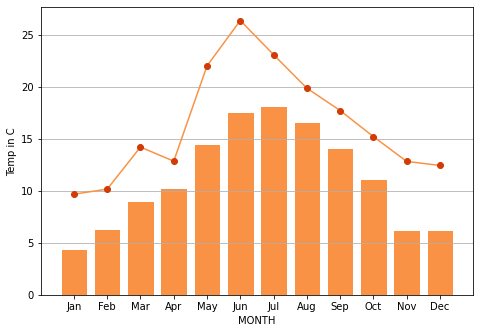

In [34]:
#Monthly graph for avg tem and max temp
min_temp_out = df['Temperature_out'].describe()['min']
max_temp_out = df['Temperature_out'].describe()['max']
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.bar(data_month['name'],data_month['Temperature_out'],color = '#F99245',edgecolor='white')
ax1.plot(data_month['name'],max_temp_out,marker='o',mec = '#D23B05',mfc = '#D23B05',color = '#F99245')
ax1.set_xlabel('MONTH')
ax1.set_ylabel('Temp in C')
ax1.grid(axis='y')
#plt.savefig('hig_avg_temp.png', transparent=True,dpi=300, bbox_inches='tight')

#intresting to see the april month decline in max temp but increase in avg

In [35]:
#finding the min atm pressure
a=20000
for i in data['Baro']:
    if i<a:
        a=i
print(a)


979.6


In [36]:
#Total RainFall
sum(data['mm'])

563.1500000000003

In [37]:
#Max Rainfall
max(data['mm'])

23.2

In [38]:
#Counting hot day>20 c
temp20 = 0
for i in data['Temperature_out']:
    if i>20:
        temp20+=1
temp20

15

In [39]:
#Counting cold day<2 c
temp2 = 0
for i in data['Temperature_out']:
    if i<2:
        temp2+=1
temp2

15

In [40]:
#counting no of high humid days >50%
h50 = 0
for i in data['Humidity']:
    if i>50:
        h50+=1
h50

136

In [41]:
#Highest temps
data.nlargest(10, 'Temp_range_high_out')

,DateTime,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Formated_date,Month,season
253,"""2017-06-21 00:00:00""",1006.8,26.06,18.0,38.5,51.0,28.97,26.8,31.1,0.0,2017-06-21,6,summer
251,"""2017-06-19 00:00:00""",1011.9,26.38,18.4,37.8,51.0,28.97,27.6,30.7,0.0,2017-06-19,6,summer
252,"""2017-06-20 00:00:00""",1010.2,25.63,18.7,35.9,51.0,29.21,27.4,30.8,0.0,2017-06-20,6,summer
267,"""2017-07-05 00:00:00""",1011.1,22.09,12.7,34.3,52.0,25.50,24.0,27.5,0.0,2017-07-05,7,summer
226,"""2017-05-25 00:00:00""",1015.4,21.97,13.8,33.3,48.0,26.34,25.1,28.1,0.0,2017-05-25,5,spring
227,"""2017-05-26 00:00:00""",1009.1,22.02,13.5,33.2,49.0,26.78,25.3,28.5,0.0,2017-05-26,5,spring
268,"""2017-07-06 00:00:00""",1007.6,22.80,16.4,32.7,52.0,27.06,25.8,28.4,0.0,2017-07-06,7,summer
280,"""2017-07-18 00:00:00""",1008.0,23.09,16.9,31.2,51.0,25.65,24.8,26.5,0.0,2017-07-18,7,summer
311,"""2017-08-27 00:00:00""",1011.3,19.50,14.0,31.0,56.0,24.96,23.7,27.0,0.0,2017-08-27,8,summer
249,"""2017-06-17 00:00:00""",1019.9,21.03,13.7,30.7,50.0,25.88,24.5,27.9,0.0,2017-06-17,6,summer


In [42]:
data.nsmallest(10, 'Temp_range_high_out')

,DateTime,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Formated_date,Month,season
87,"""2017-01-05 00:00:00""",1026.8,-0.76,-2.5,1.5,43.0,18.48,16.5,21.2,0.0,2017-01-05,1,winter
52,"""2016-11-30 00:00:00""",1027.1,-1.81,-4.1,1.6,44.0,18.11,14.9,21.4,0.0,2016-11-30,11,autum
124,"""2017-02-11 00:00:00""",1016.5,1.30,0.4,2.1,39.0,18.96,16.5,22.7,0.0,2017-02-11,2,winter
108,"""2017-01-26 00:00:00""",1009.3,1.17,-0.9,2.5,38.0,19.90,18.1,22.8,0.0,2017-01-26,1,winter
84,"""2017-01-02 00:00:00""",1022.2,0.48,-1.4,2.6,46.0,18.76,16.9,21.4,0.0,2017-01-02,1,winter
122,"""2017-02-09 00:00:00""",1019.4,1.97,1.3,2.8,42.0,19.14,17.8,22.4,1.0,2017-02-09,2,winter
53,"""2016-12-01 00:00:00""",1023.8,-1.26,-4.0,3.0,41.0,18.04,15.6,19.7,0.0,2016-12-01,12,winter
123,"""2017-02-10 00:00:00""",1017.1,1.61,0.3,3.7,40.0,18.90,16.8,22.5,0.0,2017-02-10,2,winter
51,"""2016-11-29 00:00:00""",1026.3,0.55,-1.6,3.8,47.0,18.72,16.3,22.4,0.0,2016-11-29,11,autum
103,"""2017-01-21 00:00:00""",1019.5,-0.07,-2.4,3.8,40.0,19.30,16.6,22.9,0.0,2017-01-21,1,winter


In [43]:
data.nsmallest(10, 'Temperature_out')

,DateTime,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Formated_date,Month,season
52,"""2016-11-30 00:00:00""",1027.1,-1.81,-4.1,1.6,44.0,18.11,14.9,21.4,0.0,2016-11-30,11,autum
53,"""2016-12-01 00:00:00""",1023.8,-1.26,-4.0,3.0,41.0,18.04,15.6,19.7,0.0,2016-12-01,12,winter
87,"""2017-01-05 00:00:00""",1026.8,-0.76,-2.5,1.5,43.0,18.48,16.5,21.2,0.0,2017-01-05,1,winter
103,"""2017-01-21 00:00:00""",1019.5,-0.07,-2.4,3.8,40.0,19.30,16.6,22.9,0.0,2017-01-21,1,winter
84,"""2017-01-02 00:00:00""",1022.2,0.48,-1.4,2.6,46.0,18.76,16.9,21.4,0.0,2017-01-02,1,winter
51,"""2016-11-29 00:00:00""",1026.3,0.55,-1.6,3.8,47.0,18.72,16.3,22.4,0.0,2016-11-29,11,autum
79,"""2016-12-28 00:00:00""",1033.1,1.12,-0.4,5.2,43.0,18.48,16.1,21.2,0.0,2016-12-28,12,winter
85,"""2017-01-03 00:00:00""",1021.4,1.14,-2.0,4.6,45.0,18.64,16.5,21.5,0.0,2017-01-03,1,winter
80,"""2016-12-29 00:00:00""",1028.6,1.16,-1.5,4.4,41.0,18.74,16.1,21.4,0.0,2016-12-29,12,winter
108,"""2017-01-26 00:00:00""",1009.3,1.17,-0.9,2.5,38.0,19.90,18.1,22.8,0.0,2017-01-26,1,winter


In [44]:
data.nlargest(10, 'Temperature_out')

,DateTime,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm,Formated_date,Month,season
251,"""2017-06-19 00:00:00""",1011.9,26.38,18.4,37.8,51.0,28.97,27.6,30.7,0.0,2017-06-19,6,summer
253,"""2017-06-21 00:00:00""",1006.8,26.06,18.0,38.5,51.0,28.97,26.8,31.1,0.0,2017-06-21,6,summer
252,"""2017-06-20 00:00:00""",1010.2,25.63,18.7,35.9,51.0,29.21,27.4,30.8,0.0,2017-06-20,6,summer
250,"""2017-06-18 00:00:00""",1016.2,23.13,15.2,30.7,50.0,27.35,26.1,28.7,0.0,2017-06-18,6,summer
280,"""2017-07-18 00:00:00""",1008.0,23.09,16.9,31.2,51.0,25.65,24.8,26.5,0.0,2017-07-18,7,summer
268,"""2017-07-06 00:00:00""",1007.6,22.80,16.4,32.7,52.0,27.06,25.8,28.4,0.0,2017-07-06,7,summer
267,"""2017-07-05 00:00:00""",1011.1,22.09,12.7,34.3,52.0,25.50,24.0,27.5,0.0,2017-07-05,7,summer
271,"""2017-07-09 00:00:00""",1005.8,22.03,17.4,29.5,51.0,27.61,26.4,29.3,0.0,2017-07-09,7,summer
227,"""2017-05-26 00:00:00""",1009.1,22.02,13.5,33.2,49.0,26.78,25.3,28.5,0.0,2017-05-26,5,spring
226,"""2017-05-25 00:00:00""",1015.4,21.97,13.8,33.3,48.0,26.34,25.1,28.1,0.0,2017-05-25,5,spring


In [45]:
#Exported the data to plot a few extra graph.
#data.to_excel('f.xlsx')

In [46]:

data.groupby(data['season']).describe()

Baro                                                            \
       count         mean        std    min      25%      50%      75%   
season                                                                   
autum   92.0  1008.953261  10.280671  979.6  1003.05  1010.35  1015.40   
spring  91.0  1010.231868   9.795530  980.8  1005.40  1011.80  1015.65   
summer  83.0  1007.133735   6.149346  989.9  1003.45  1008.40  1010.85   
winter  89.0  1013.513483  11.302898  980.9  1009.10  1016.50  1019.80   

               Temperature_out             ...    mm       Month             \
           max           count       mean  ...   75%   max count       mean   
season                                     ...                                
autum   1027.1            92.0  10.515231  ...  2.20  23.2  92.0  10.000000   
spring  1028.6            91.0  11.309011  ...  1.00  16.9  91.0   4.010989   
summer  1019.9            83.0  17.557831  ...  3.15  19.0  83.0   6.903614   
winter  1035.6            89.0   5.623371  ...  1.00  17.9  89.0   5.022472   

                                              
             std  min  25%   50%   75%   max  
season                                        
autum   0.811998  9.0  9.0  10.0  11.0  11.0  
spring  0.823198  3.0  3.0   4.0   5.0   5.0  
summer  0.790407  6.0  6.0   7.0   8.0   8.0  
winter  5.020362  1.0  1.0   2.0  12.0  12.0  

[4 rows x 80 columns]

In [47]:
data_season.describe()

,Baro,Temperature_out,Temp_range_low_out,Temp_range_high_out,Humidity,Temperature_in,Temp_range_low_in,Temp_range_high_in,mm
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1009.958087,11.251361,7.965548,15.662818,48.607246,21.878883,20.614107,23.568536,1.598945
std,2.689637,4.898675,4.231491,6.361999,4.884372,1.893384,2.267237,1.342501,0.725857
min,1007.133735,5.623371,3.257303,8.151685,43.842697,19.837303,18.030337,22.483146,0.880220
25%,1008.498379,9.292266,6.333831,12.677324,44.727158,20.849961,19.550791,22.585460,1.031993
50%,1009.592565,10.912121,7.530757,15.496781,48.521859,21.671669,20.459024,23.205936,1.583683
75%,1011.052272,12.871216,9.162474,18.482275,52.401947,22.700591,21.522340,24.189012,2.150635
max,1013.513483,17.557831,13.543373,23.506024,53.542570,24.334892,23.508041,25.379125,2.348193


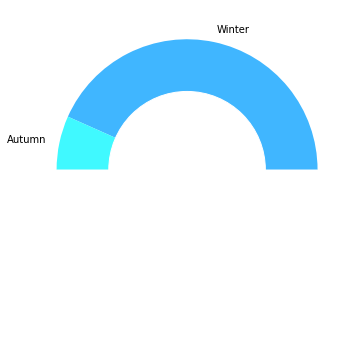

In [48]:
fig = plt.figure(figsize=(8,6))
ax2 = fig.add_subplot(1,1,1)
ax2.pie([13,2,15], labels=['Winter','Autumn',''], colors = ['#40b6ff','#40f9ff','white'])#,'#ff7640','#f9d62e'])
ax2.add_artist(plt.Circle((0, 0), 0.6, color='white'))
p = plt.gcf()
#plt.savefig('colddays.png', transparent=True,dpi=300, bbox_inches='tight')

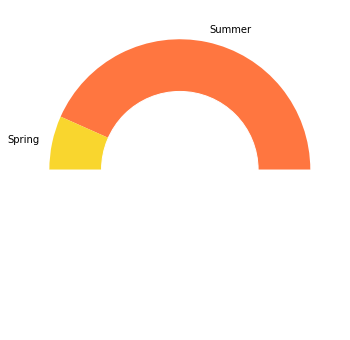

In [49]:
fig = plt.figure(figsize=(8,6))
ax2 = fig.add_subplot(1,1,1)
ax2.pie([13,2,15], labels=['Summer','Spring',''], colors = ['#ff7640','#f9d62e','white'])
ax2.add_artist(plt.Circle((0, 0), 0.6, color='white'))
p = plt.gcf()
#plt.savefig('hotdays.png', transparent=True,dpi=300, bbox_inches='tight')

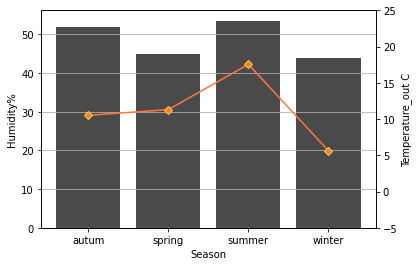

In [50]:
fig,ax = plt.subplots()

plt2 = ax.bar(data_season.index,data_season['Humidity'],color = '#4a4a4a')

ax_b=ax.twinx()

plt1 = ax_b.plot(data_season.index,data_season['Temperature_out'],marker='D',mec = '#f9d62e',mfc = '#ff7640',color = '#ff7640')
ax_b.set_ylim(-5,25)
ax.set_xlabel('Season')
ax.set_ylabel('Humidity%')
ax_b.set_ylabel('Temperature_out C')

ax.grid(axis='y')
plt.show()
fig.savefig('hig_avg_temp_humidity.png', transparent=True,dpi=300, bbox_inches='tight')





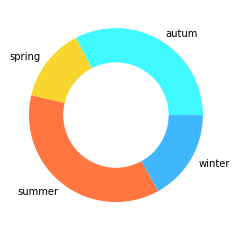

In [51]:
#SEASONAL DATA RAIN SPEAD OVER THE SEASONS
exploda = (0, 0, 0, 0.1, 0)
my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie(data_season['mm'], labels=data_season.index, colors=['#40f9ff','#f9d62e','#ff7640','#40b6ff'])
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.savefig('seasonal_rain_dist.png', transparent=True,dpi=300, bbox_inches='tight')

In [52]:
data['Temp_range_low_in']

0      21.0
1      20.4
2      19.9
3      20.0
4      20.1
       ... 
350    20.6
351    20.3
352    20.6
353    20.6
354    22.2
Name: Temp_range_low_in, Length: 355, dtype: float64